# Module 2 Project: Predicting Departure delays from JFK Airport

# 1. Import On-Time Reporting Data & Create Sample subset (5% of data)

In [4]:
# Source : Bureau of Transportation
# link : https://www.bts.gov/topics/airlines-and-airports/airline-time-performance-and-causes-flight-delays

files = ["729675446_T_ONTIME_REPORTING-APR2017.csv",
"729675446_T_ONTIME_REPORTING-APR2018.csv",
"729675446_T_ONTIME_REPORTING-AUG2017.csv",
"729675446_T_ONTIME_REPORTING-AUG2018.csv",
"729675446_T_ONTIME_REPORTING-DEC2017.csv",
"729675446_T_ONTIME_REPORTING-FEB2017.csv",
"729675446_T_ONTIME_REPORTING-FEB2018.csv",
"729675446_T_ONTIME_REPORTING-JAN2017.csv",
"729675446_T_ONTIME_REPORTING-JUL2017.csv",
"729675446_T_ONTIME_REPORTING-JUL2018.csv",
"729675446_T_ONTIME_REPORTING-JUN2017.csv",
"729675446_T_ONTIME_REPORTING-JUN2018.csv",
"729675446_T_ONTIME_REPORTING-MAR2017.csv",
"729675446_T_ONTIME_REPORTING-MAR2018.csv",
"729675446_T_ONTIME_REPORTING-MAY2017.csv",
"729675446_T_ONTIME_REPORTING-MAY2018.csv",
"729675446_T_ONTIME_REPORTING-NOV2017.csv",
"729675446_T_ONTIME_REPORTING-NOV2018.csv",
"729675446_T_ONTIME_REPORTING-OCT2017.csv",
"729675446_T_ONTIME_REPORTING-OCT2018.csv",
"729675446_T_ONTIME_REPORTING-SEP2017.csv",
"729675446_T_ONTIME_REPORTING-SEP2018.csv",
"729675446_T_ONTIME_REPORTING.-JAN2018.csv"]

In [5]:
import pandas as pd
dfs = []
for file in files:
    df = pd.read_csv('data/'+file)
    dfs.append(df)
df = pd.concat(dfs)

/Users/lukeborsare/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12294225 entries, 0 to 570117
Data columns (total 37 columns):
YEAR                   int64
QUARTER                int64
MONTH                  int64
DAY_OF_WEEK            int64
FL_DATE                object
OP_UNIQUE_CARRIER      object
TAIL_NUM               object
OP_CARRIER_FL_NUM      int64
ORIGIN_AIRPORT_ID      int64
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
DEST_AIRPORT_ID        int64
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
CRS_DEP_TIME           int64
DEP_DELAY              float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
FLIGHTS                float64
DISTANCE               float64
DISTANCE_GROUP

In [7]:
# Sample data (5%)
df_sample = df.sample(frac = 0.05, replace= False, random_state=125)
df_sample = df_sample.drop(['Unnamed: 36','FLIGHTS'],axis = 1)

In [8]:
# Descriptive statistics of Flight sample data
df_sample.describe()

,YEAR,QUARTER,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,...,CANCELLED,DIVERTED,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME
count,614711.000000,614711.000000,614711.000000,614711.000000,614711.000000,614711.000000,614711.000000,614711.000000,605023.000000,605023.000000,...,614711.000000,614711.000000,614711.000000,614711.000000,113927.000000,113927.000000,113927.000000,113927.000000,113927.000000,3822.000000
mean,2017.538473,2.449964,6.300113,3.931862,2390.837639,12672.575256,12674.312705,1329.940914,10.000293,0.183408,...,0.015838,0.002404,826.874772,3.778649,19.696341,3.369131,16.057291,0.086415,25.707506,1326.599424
std,0.498518,1.080087,3.251514,1.989076,1820.003967,1524.666793,1525.423612,490.950431,44.507485,0.387001,...,0.124850,0.048976,611.768700,2.407858,60.122221,28.906918,36.027679,2.927589,48.856044,510.944962
min,2017.000000,1.000000,1.000000,1.000000,1.000000,10135.000000,10135.000000,1.000000,-123.000000,0.000000,...,0.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2017.000000,2.000000,4.000000,2.000000,850.000000,11292.000000,11292.000000,915.000000,-5.000000,0.000000,...,0.000000,0.000000,372.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,854.000000
50%,2018.000000,2.000000,6.000000,4.000000,1886.000000,12889.000000,12889.000000,1322.000000,-2.000000,0.000000,...,0.000000,0.000000,651.000000,3.000000,0.000000,0.000000,3.000000,0.000000,4.000000,1339.500000
75%,2018.000000,3.000000,9.000000,6.000000,3758.000000,14027.000000,14027.000000,1735.000000,7.000000,0.000000,...,0.000000,0.000000,1066.000000,5.000000,17.000000,0.000000,19.000000,0.000000,32.000000,1745.000000
max,2018.000000,4.000000,12.000000,7.000000,7439.000000,16218.000000,16218.000000,2359.000000,1648.000000,1.000000,...,1.000000,1.000000,4983.000000,11.000000,1613.000000,1312.000000,1423.000000,593.000000,1422.000000,2359.000000


In [9]:
df_sample.to_csv('sample_flightdelay_2017-18.csv')

# 2. Flight Delays: Data Cleaning & Exploration

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [13]:
df_sample = pd.read_csv('sample_flightdelay_2017-18.csv')

In [14]:
# Cleaning dataframe
df_sample.fillna(0,inplace=True)
df_sample = df_sample.drop(['Unnamed: 0'],axis = 1)
df_sample = df_sample.rename(columns = {'FL_DATE':'DATE'}) # For merge with Weather data in Step 4

In [15]:
# Subset - JFK departures
df_sample = df_sample[df_sample['ORIGIN'] == 'JFK']

In [16]:
# Exploring insights from the data
df_grouped = df_sample.groupby("OP_UNIQUE_CARRIER").max()
df_grouped.head()

,YEAR,QUARTER,MONTH,DAY_OF_WEEK,DATE,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,CANCELLED,DIVERTED,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME
OP_UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,
9E,2018,4,11,7,2018-11-30,5524,12478,JFK,"New York, NY",NY,...,1.0,1.0,1391.0,6,277.0,890.0,727.0,0.0,488.0,2212.0
AA,2018,4,12,7,2018-11-30,2830,12478,JFK,"New York, NY",NY,...,1.0,1.0,2586.0,11,845.0,239.0,257.0,11.0,591.0,2143.0
AS,2018,4,12,7,2018-11-30,1415,12478,JFK,"New York, NY",NY,...,1.0,1.0,2586.0,11,261.0,261.0,171.0,91.0,239.0,2019.0
B6,2018,4,12,7,2018-11-30,2989,12478,JFK,"New York, NY",NY,...,1.0,1.0,2586.0,11,345.0,423.0,399.0,29.0,347.0,2222.0
DL,2018,4,12,7,2018-11-30,2977,12478,JFK,"New York, NY",NY,...,1.0,1.0,4983.0,11,948.0,701.0,470.0,116.0,387.0,2113.0


In [20]:
# Categorical data - Label encoding to check for Multicolinearity
df_sample['OP_UNIQUE_CARRIER_CODE'] = df_sample['OP_UNIQUE_CARRIER'].astype('category').cat.codes
df_sample['OP_CARRIER_FL_NUM_CODE'] = df_sample['OP_CARRIER_FL_NUM'].astype('category').cat.codes
df_sample['DEST_AIRPORT_ID_CODE'] = df_sample['DEST_AIRPORT_ID'].astype('category').cat.codes
df_sample['TAIL_NUM_CODE'] = df_sample['TAIL_NUM'].astype('category').cat.codes

Text(0.5, 1.0, 'Correlation of BTS variables')

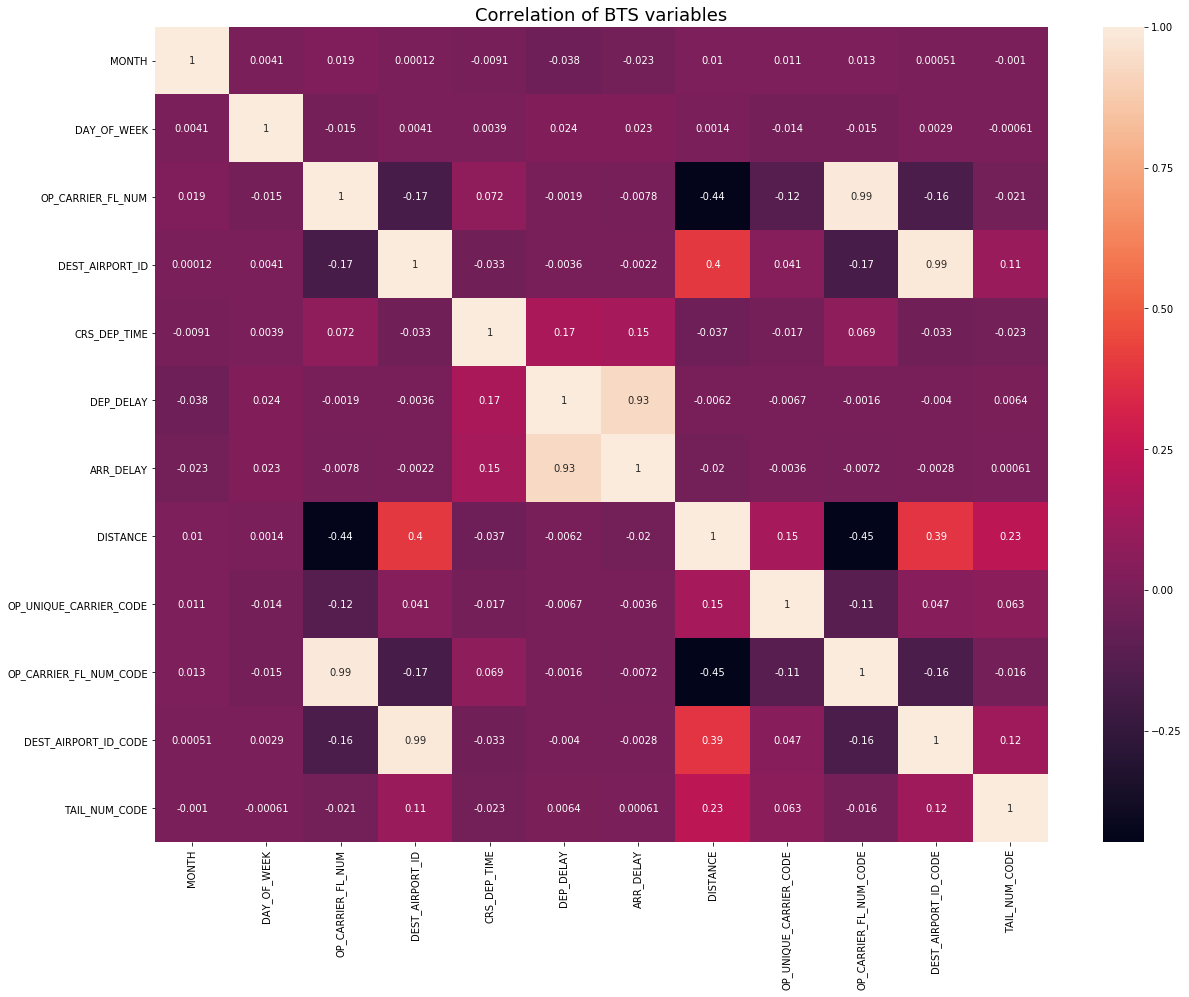

In [21]:
# Correlation between BTS Variables to account for potential Multicolinearity

plt.subplots(figsize=(20,15))
sns.heatmap(df_sample.corr(),annot=True)
plt.title('Correlation of BTS variables', size = 18)

In [22]:
# Dropping redundant columns
df_sample = df_sample.drop(['YEAR','QUARTER','DEP_DELAY_GROUP','CANCELLED','DEP_DEL15','ARR_DEL15','ARR_DELAY_GROUP','ARR_TIME','FIRST_DEP_TIME','ORIGIN_AIRPORT_ID',
                           'DISTANCE_GROUP','DIVERTED','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'],axis = 1)


KeyError: "['YEAR' 'QUARTER' 'DEP_DELAY_GROUP' 'CANCELLED' 'DEP_DEL15' 'ARR_DEL15'\n 'ARR_DELAY_GROUP' 'ARR_TIME' 'FIRST_DEP_TIME' 'ORIGIN_AIRPORT_ID'\n 'DISTANCE_GROUP' 'DIVERTED' 'CARRIER_DELAY' 'WEATHER_DELAY' 'NAS_DELAY'\n 'SECURITY_DELAY' 'LATE_AIRCRAFT_DELAY'] not found in axis"

Text(0.5, 1.0, 'Correlation of BTS variables - #2')

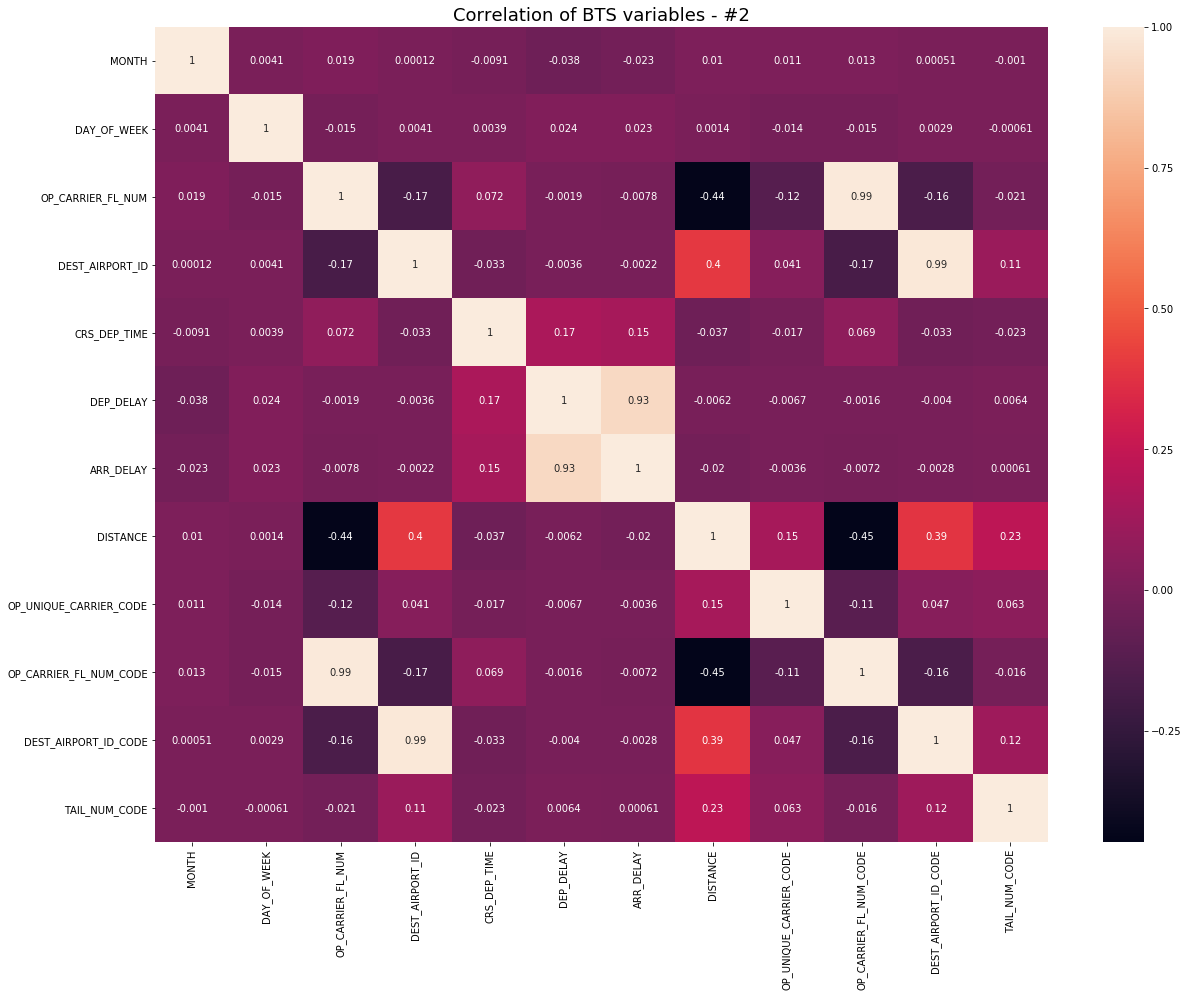

In [23]:
# Correlation heatmap without redundant variables

plt.subplots(figsize=(20,15))
sns.heatmap(df_sample.corr(),annot=True)
plt.title('Correlation of BTS variables - #2', size = 18)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17b098b38>,
      dtype=object)

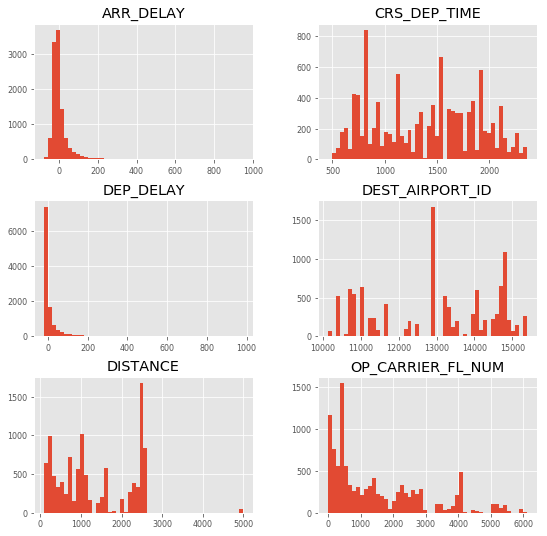

In [26]:
# Distributions of continuous variables
df_continuous = df_sample.drop(['MONTH','DAY_OF_WEEK'],axis = 1)
df_continuous.select_dtypes(include = ['float64', 'int64']).hist(figsize=(9,9), bins=50, xlabelsize=8, ylabelsize=8)


<Figure size 432x288 with 0 Axes>

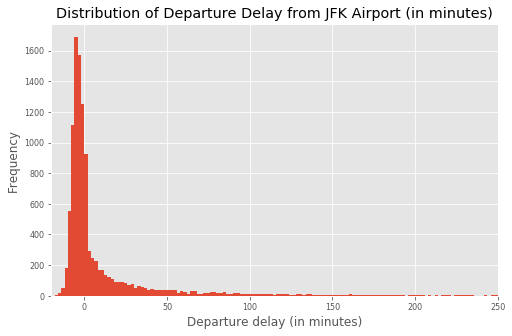

In [25]:
# Distribution of Dependent variable : Departure delay from JFK Airport

plt.style.use("ggplot")
fig = plt.figure()
plt.subplots(figsize = (8,5))
plt.xlim([-20,250])
plt.xlabel('Departure delay (in minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Delay from JFK Airport (in minutes)')
df_sample['DEP_DELAY'].hist(bins=500, xlabelsize=8, ylabelsize=8)

<Figure size 432x288 with 0 Axes>

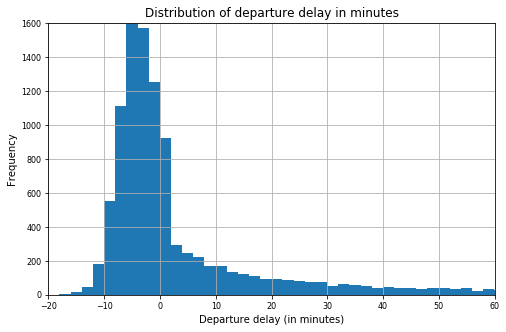

In [24]:
# Distribution of Dependent variable - Closer look

fig = plt.figure()
plt.subplots(figsize = (8,5))
plt.xlim([-20,60])
plt.ylim([0,1600])
plt.xlabel('Departure delay (in minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of departure delay in minutes')
df_sample['DEP_DELAY'].hist(bins=500, xlabelsize=8, ylabelsize=8)

<Figure size 432x288 with 0 Axes>

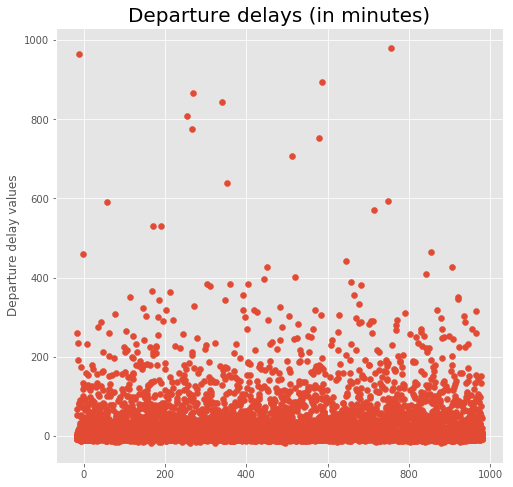

In [27]:
# Homoscedacity of Target Variable & Identifying outliers

plt.style.use("ggplot")
fig = plt.figure()
plt.subplots(figsize = (8,8))
first = df_sample['DEP_DELAY'].min()
last = df_sample['DEP_DELAY'].max()
num = df_sample['DEP_DELAY'].count()
plt.ylabel('Departure delay values')
plt.title('Departure delays (in minutes)',size=20)
plt.scatter(np.linspace(first, last, num =num),df_sample['DEP_DELAY'])

In [28]:
# Skewness & Kurtosis
print(df_sample['DEP_DELAY'].skew())
print(df_sample['DEP_DELAY'].kurtosis())

6.848050545853902
77.18942949337072


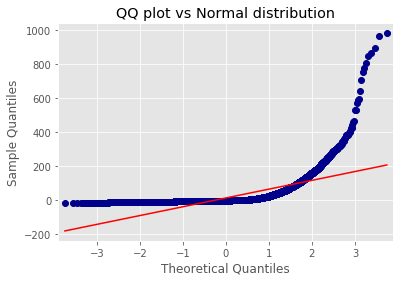

In [29]:
# QQ plot of Dependent variable vs Normal distribution
from statsmodels.graphics.gofplots import qqplot
qqplot(df_sample['DEP_DELAY'], line='s', color = 'darkblue')
plt.title('QQ plot vs Normal distribution')
plt.show()

In [24]:
# Log Departure delays, Distance & Arrival delays as they are heavily positively skewed
# Will not be used as Initial distribution provides more accurate predictions
# Keeping Code to test on larger sample if needed

#df_sample['ARR_DELAY_LOG'] = np.log(df_sample['ARR_DELAY'])
#df_sample['DEP_DELAY_LOG'] = np.log(df_sample['DEP_DELAY'])
#df_sample['DISTANCE_LOG'] = np.log(df_sample['DISTANCE'])
#df_sample['ARR_DELAY_LOG'] = [0 if i < 0 else i for i in df_sample['ARR_DELAY_LOG']]
#df_sample['DEP_DELAY_LOG'] = [0 if i < 0 else i for i in df_sample['DEP_DELAY_LOG']]
#df_sample = df_sample.fillna(0)

In [30]:
# Outliers  : Final Subset to be used for Regression will omit departure delays > 1500
df_sample_JFK = df_sample[df_sample['DEP_DELAY'] <= 1500]

In [31]:
df_sample_JFK.describe()

,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE,OP_UNIQUE_CARRIER_CODE,OP_CARRIER_FL_NUM_CODE,DEST_AIRPORT_ID_CODE,TAIL_NUM_CODE
count,10857.000000,10857.000000,10857.000000,10857.000000,10857.000000,10857.000000,10857.000000,10857.000000,10857.000000,10857.000000,10857.000000,10857.000000
mean,6.266188,3.982223,1493.820116,12960.412729,1384.425163,13.488717,5.272543,1345.999908,2.977342,380.672838,35.093949,989.506401
std,3.240608,1.997824,1438.456128,1556.439591,492.914891,51.759989,55.407026,900.394660,1.921795,306.368079,19.921835,614.269082
min,1.000000,1.000000,1.000000,10140.000000,458.000000,-18.000000,-76.000000,94.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,411.000000,11292.000000,914.000000,-6.000000,-21.000000,541.000000,1.000000,144.000000,19.000000,386.000000
50%,6.000000,4.000000,942.000000,12892.000000,1445.000000,-2.000000,-7.000000,1069.000000,3.000000,300.000000,32.000000,1042.000000
75%,9.000000,6.000000,2371.000000,14570.000000,1820.000000,8.000000,10.000000,2422.000000,4.000000,564.000000,54.000000,1521.000000
max,12.000000,7.000000,6104.000000,15376.000000,2359.000000,981.000000,948.000000,4983.000000,10.000000,1212.000000,71.000000,2007.000000


# 3.  Import JFK weather data & Data exploration

In [32]:
# Import Weather Data 
# Source : https://www.ncdc.noaa.gov/

df_JFK_weather = pd.read_csv('JFK_weather.csv')
df_JFK_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
STATION    730 non-null object
NAME       730 non-null object
DATE       730 non-null object
AWND       730 non-null float64
DAPR       0 non-null float64
DASF       0 non-null float64
MDPR       0 non-null float64
MDSF       0 non-null float64
PGTM       1 non-null float64
PRCP       730 non-null float64
SNOW       730 non-null float64
SNWD       730 non-null float64
WDF2       730 non-null int64
WDF5       724 non-null float64
WSF2       730 non-null float64
WSF5       724 non-null float64
WT01       320 non-null float64
WT02       64 non-null float64
WT03       55 non-null float64
WT04       10 non-null float64
WT05       1 non-null float64
WT06       3 non-null float64
WT08       37 non-null float64
WT09       4 non-null float64
WT11       0 non-null float64
dtypes: float64(21), int64(1), object(3)
memory usage: 142.7+ KB


In [33]:
# Dropping unnecessary columns and filling NA values for 0 values as they are indicators
df_JFK_weather = df_JFK_weather.drop(['STATION','DAPR','DASF','MDPR','MDSF'],axis =1)
df_JFK_weather = df_JFK_weather.fillna(0)

Text(0.5, 1.0, 'Correlation of JFK weather variables')

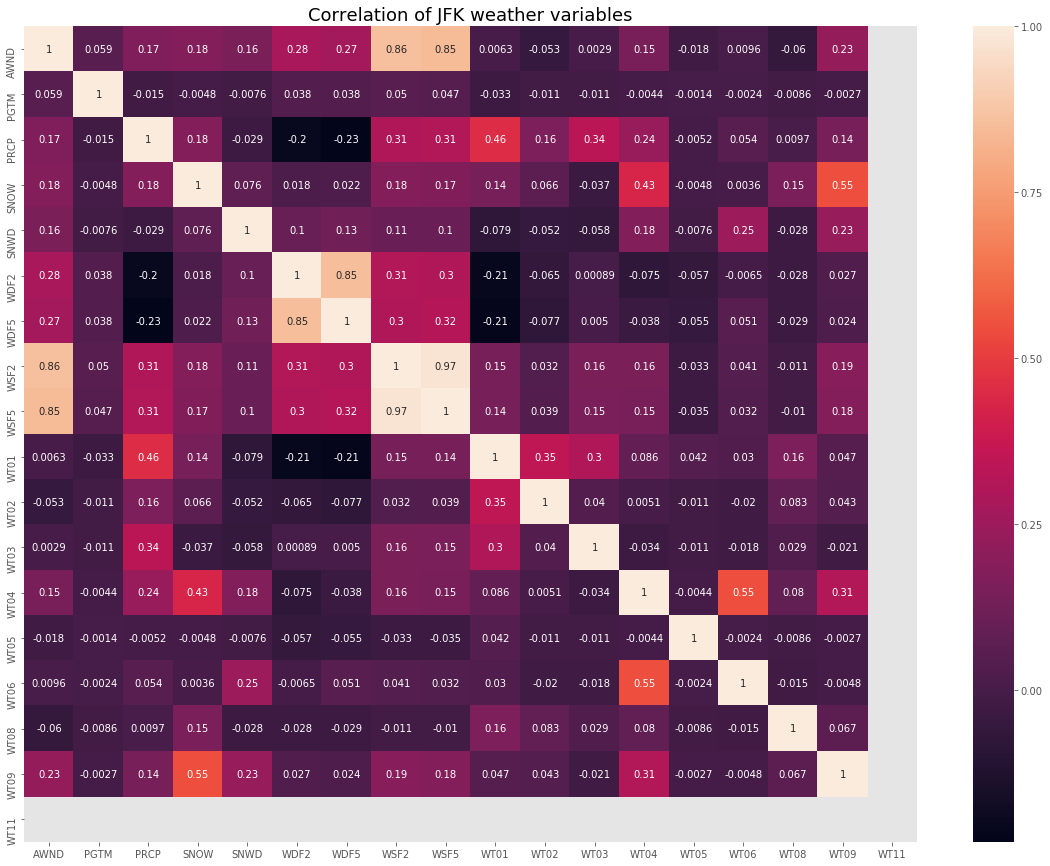

In [34]:
# JFK Weather data
plt.subplots(figsize=(20,15))
sns.heatmap(df_JFK_weather.corr(),annot=True)
plt.title('Correlation of JFK weather variables', size = 18)

In [37]:
# JFK Weather data - drop poor features
df_JFK_weather = df_JFK_weather.drop(['PGTM','WT04','WSF2','WSF5','WT04','WT05','WT06','WT08','WT09','WT11'],axis =1)


KeyError: "['PGTM' 'WT04' 'WSF2' 'WSF5' 'WT04' 'WT05' 'WT06' 'WT08' 'WT09' 'WT11'] not found in axis"

# 4. Combing Weather data to Flight delays data

In [38]:
df_sample_JFK = df_sample_JFK.merge(df_JFK_weather,on = 'DATE',how = 'left')

In [39]:
df_sample_JFK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10857 entries, 0 to 10856
Data columns (total 32 columns):
MONTH                     10857 non-null int64
DAY_OF_WEEK               10857 non-null int64
DATE                      10857 non-null object
OP_UNIQUE_CARRIER         10857 non-null object
TAIL_NUM                  10857 non-null object
OP_CARRIER_FL_NUM         10857 non-null int64
ORIGIN                    10857 non-null object
ORIGIN_CITY_NAME          10857 non-null object
ORIGIN_STATE_ABR          10857 non-null object
DEST_AIRPORT_ID           10857 non-null int64
DEST                      10857 non-null object
DEST_CITY_NAME            10857 non-null object
DEST_STATE_ABR            10857 non-null object
CRS_DEP_TIME              10857 non-null int64
DEP_DELAY                 10857 non-null float64
ARR_DELAY                 10857 non-null float64
CANCELLATION_CODE         10857 non-null object
DISTANCE                  10857 non-null float64
OP_UNIQUE_CARRIER_CODE    108

# 5. Regression on small sample size

In [40]:
# Import necessary packages

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [41]:
# Used to compare to Log Delay time - Not used in Regression
# df_sample_JFK['DEP_DELAY_LOG'] = [np.log(i) if i > 0 else 0 for i in df_sample_JFK['DEP_DELAY']]

In [42]:
# Dummy variables for categorical data

carrier_dummies = pd.DataFrame(pd.get_dummies(df_sample_JFK['OP_UNIQUE_CARRIER'],drop_first = 1))
fl_num_dummies = pd.DataFrame(pd.get_dummies((df_sample_JFK['OP_CARRIER_FL_NUM']),drop_first = 1))
dest_dummies = pd.DataFrame(pd.get_dummies((df_sample_JFK['DEST_AIRPORT_ID']),drop_first = 1))
tail_dummies = pd.DataFrame(pd.get_dummies((df_sample_JFK['TAIL_NUM']),drop_first = 1))

In [43]:
# Combining dummies for Regression purpose

all_dummies = pd.concat([tail_dummies], axis=1)

In [44]:
# Selecting Features to include in regression

all_dummies['WT01'] = df_sample_JFK['WT01']
all_dummies['SNWD'] = df_sample_JFK['SNWD']
all_dummies['WT03'] = df_sample_JFK['WT03']
all_dummies['PRCP'] = df_sample_JFK['PRCP']
all_dummies['AWND'] = df_sample_JFK['AWND']

In [51]:
len(all_dummies)

10857

In [45]:
# X & Y for regression
X = all_dummies
Y = pd.DataFrame(df_sample_JFK['DEP_DELAY'])

In [46]:
# Linear Regression
model = sm.OLS(Y, X)
model.get_distribution
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DEP_DELAY   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.712
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.09e-59
Time:                        17:23:39   Log-Likelihood:                -56825.
No. Observations:               10857   AIC:                         1.177e+05
Df Residuals:                    8845   BIC:                         1.323e+05
Df Model:                        2012                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N101NN         2.1680     14.619      0.148      0.882     -26.489      30.825
N102HQ         3.4914     50.308      0.069      0.945     -95.125     102.108
N102NN        -7.5884     11.937     -0.636      0.525     -30.988      15.811
N103AA       -12.3306     50.288     -0.245      0.806    -110.906      86.245
N103NN        -2.0251     11.944     -0.170      0.865     -25.438      21.388
N103US       -13.3397     50.314     -0.265      0.791    -111.966      85.287
N104NN       -20.3204     11.952     -1.700      0.089     -43.749       3.108
N104UW       -14.9851     50.318     -0.298      0.766    -113.619      83.649
N105NN        -7.4206     12.648     -0.587      0.557     -32.214      17.373
N106NN        10.6903     13.046      0.819      0.413     -14.883      36.264
N107NN       -17.4859     12.660     -1.381      0.167     -42.302       7.330
N108NN       -14.9022     13.059     -1.141      0.254     -40.500      10.696
N109NN        -7.5676     11.648     -0.650      0.516     -30.400      15.264
N109UW       -15.9350     50.307     -0.317      0.751    -114.549      82.679
N110AN        -0.1203     12.300     -0.010      0.992     -24.231      23.991
N111HQ       -15.2781     50.294     -0.304      0.761    -113.866      83.310
N111ZM         7.8109     11.343      0.689      0.491     -14.424      30.046
N112AN       -15.7699     11.357     -1.389      0.165     -38.032       6.492
N112HQ       -23.3941     35.641     -0.656      0.512     -93.259      46.471
N113AN        -7.3210     10.843     -0.675      0.500     -28.576      13.934
N114NN        -6.5159     14.010     -0.465      0.642     -33.978      20.946
N115NN        -8.0183     11.086     -0.723      0.470     -29.750      13.713
N116AN       -10.1280     12.693     -0.798      0.425     -35.010      14.754
N117AA        -0.5661     35.572     -0.016      0.987     -70.296      69.163
N117AN       -12.0247     13.076     -0.920      0.358     -37.656      13.607
N118AA       -24.4983     50.324     -0.487      0.626    -123.145      74.148
N1200K        -6.2576     25.160     -0.249      0.804     -55.577      43.062
N1201P        -9.8765     25.200     -0.392      0.695     -59.275      39.522
N121HQ       -23.4616     50.349     -0.466      0.641    -122.157      75.234
N122AA         8.9219     50.299      0.177      0.859     -89.677     107.520
N122US        -2.5635     50.289     -0.051      0.959    -101.142      96.015
N124AA       -26.3551     50.364     -0.523      0.601    -125.081      72.371
N127AA       115.8552     50.282      2.304      0.021      17.292     214.419
N131EV        -3.9515     16.793     -0.235      0.814     -36.870      28.967
N132EV        20.1150     17.829      1.128      0.259     -14.833      55.063
N132HQ       -20.7673     50.327     -0.413      0.680    -119.421      77.886
N1

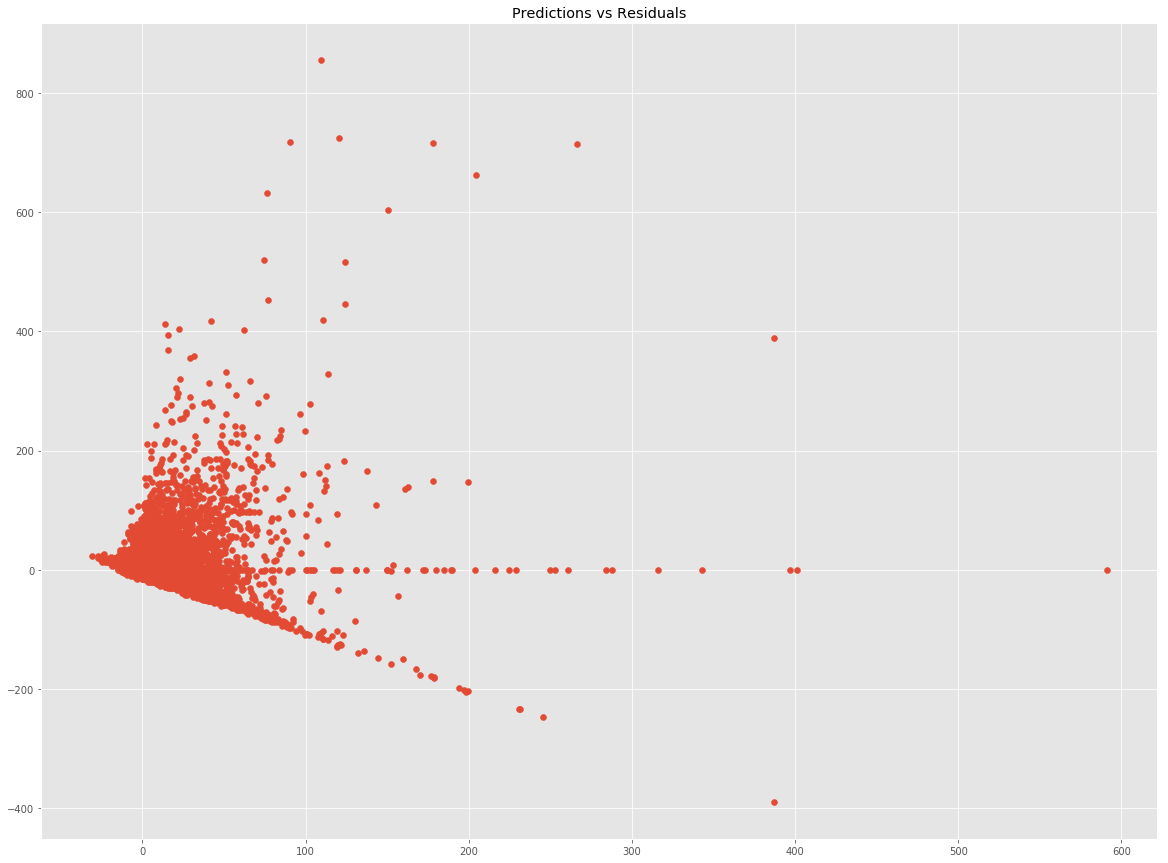

In [47]:
# Scatter plot of predictions & their residuals
plt.subplots(figsize = (20,15))
plt.title('Predictions vs Residuals')
plt.scatter(results.predict(),np.array(results.resid))

<Figure size 432x288 with 0 Axes>

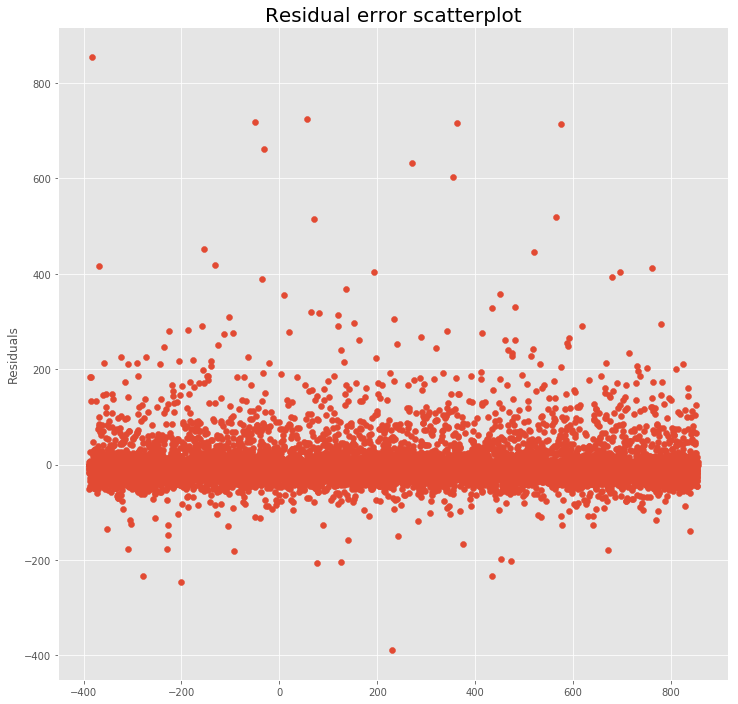

In [48]:
# Residuals distribution scatterplot - Homoscedasticity

plt.style.use("ggplot")
fig = plt.figure()
plt.subplots(figsize = (12,12))
first = min(np.array(results.resid))
last = max(np.array(results.resid))
plt.ylabel('Residuals')
plt.title('Residual error scatterplot',size=20)
plt.scatter(np.linspace(first, last, num=len(np.array(results.resid))),np.array(results.resid))


/Users/lukeborsare/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-50, 50)

<Figure size 432x288 with 0 Axes>

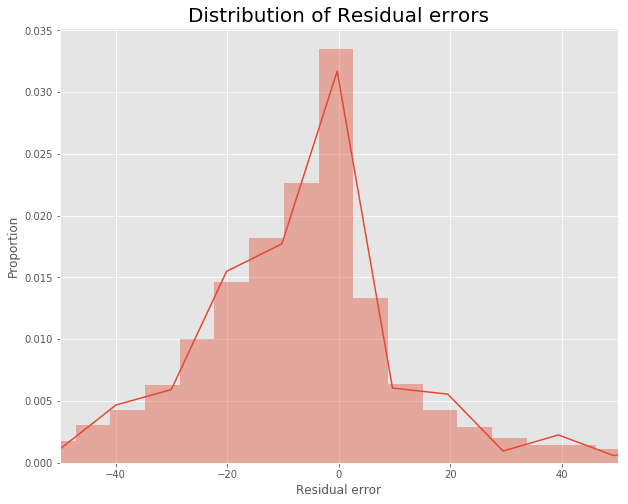

In [49]:
# Histogram distribution of residuals

fig = plt.figure()
plt.subplots(figsize = (10,8))
sns.distplot(np.array(results.resid),bins = 200)
plt.xlabel('Residual error')
plt.ylabel('Proportion')
plt.title('Distribution of Residual errors',size=20)
plt.xlim([-50,50])

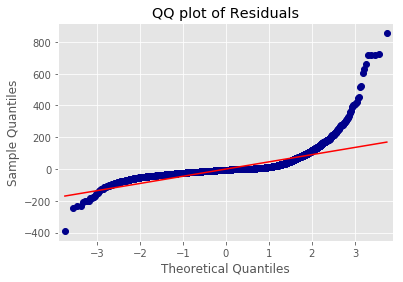

In [50]:
# Residuals Q-Q plot shows skewness in the underlying distribution
# Residuals do not seem to be normally distributed

from statsmodels.graphics.gofplots import qqplot
qqplot(np.array(results.resid), line='s', color = 'darkblue')
plt.title('QQ plot of Residuals')
plt.show()


In [51]:
# Anova one way test

all_dummies_delays = all_dummies
all_dummies_delays['DEP_DELAY'] = df_sample_JFK['DEP_DELAY']

X= X.drop('DEP_DELAY',axis = 1)

f = 'DEP_DELAY ~ X'
lm = ols(f, all_dummies_delays).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
X,6.731321e+06,2012.0,1.32369,6.748251e-17
Residual,2.235295e+07,8844.0,NaN,NaN
